#Statistics 72556 Final
Raafi Rahman

##Set Up

####Import Libraries

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#try:
#    # %tensorflow_version only exists in Colab.
#    %tensorflow_version 2.x
#    IS_COLAB = True
#except Exception:
#    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

#if not tf.config.list_physical_devices('GPU'):
#    print("No GPU was detected. CNNs can be very slow without a GPU.")
#    if IS_COLAB:
#        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os
import cv2
import random
import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

tf.test.gpu_device_name()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/device:GPU:0'

####Helper Functions

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

####Load Data

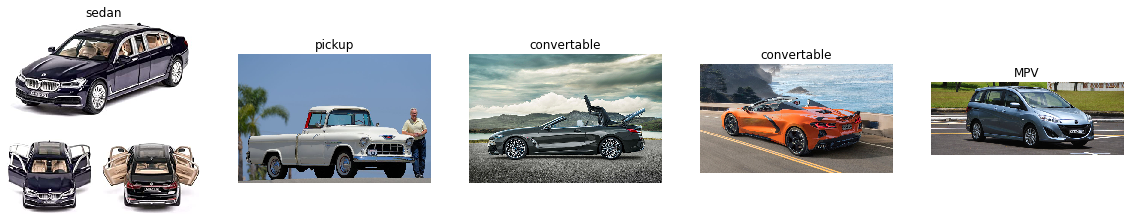

In [ ]:
plt.figure(figsize=(20,20))

folder = "/content/drive/MyDrive/Colab Notebooks/Advanced Machine Learning/Datasets/carData"

for i in range(5):
  file = random.choice(os.listdir(folder))
  folderPath = os.path.join(folder, file)
  randImg = random.choice(os.listdir(folderPath))
  imgPath = os.path.join(folderPath, randImg)
  img = mpimg.imread(imgPath)
  ax = plt.subplot(1, 5, i+1)
  ax.title.set_text(file)
  plot_image(img)

####Extract Labels, Resize Images, and Filter Images

In [ ]:
X_full_cnn = []
X_full_bw = []
X_full_Res = []

class_name = []

for group in os.listdir(folder):
  for img in os.listdir(os.path.join(folder, group))[:250]: # Only take 250 from each category to have the same number of samples
    imgPath = os.path.join(folder, group, img)

    if imgPath.lower().endswith(('.png', '.jpg', '.jpeg')): # Filter out non-standard img types such as '.gif'
      
      # For CNN
      imgCNN = cv2.imread(imgPath)
      imgCNN = cv2.resize(imgCNN, (256, 256), interpolation = cv2.INTER_AREA) # Resize to uniform compact size
      imgCNN = np.array(imgCNN)
      imgCNN = imgCNN/255

      # For Baselines and Dense Network Network
      imgBW = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
      imgBW = cv2.resize(imgBW, (256, 256), interpolation = cv2.INTER_AREA) # Resize to uniform compact size
      imgBW = np.array(imgBW)
      imgBW = imgBW/255

      # For ResNet-50
      imgRes = cv2.imread(imgPath)
      imgRes = cv2.resize(imgRes, (256, 256), interpolation = cv2.INTER_AREA) # Resize to uniform compact size
      imgRes = keras.applications.resnet50.preprocess_input(imgRes)
      imgRes = np.array(imgRes)
      imgRes = imgRes.astype('float32')

      X_full_cnn.append(imgCNN)
      X_full_bw.append(imgBW)
      X_full_Res.append(imgRes)

      class_name.append(group)

'sedan'

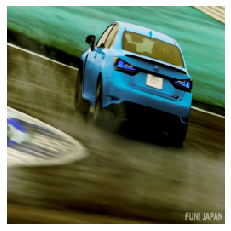

In [ ]:
plot_image(X_full_cnn[0])
class_name[0]

'sedan'

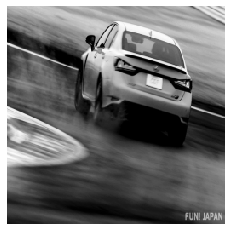

In [ ]:
plot_image(X_full_bw[0])
class_name[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'sedan'

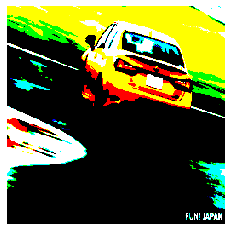

In [ ]:
plot_image(X_full_Res[0])
class_name[0]

In [ ]:
target_dict = {k : v for v, k in enumerate(np.unique(class_name))}
target_dict

{'MPV': 0,
 'SUV': 1,
 'convertable': 2,
 'pickup': 3,
 'sedan': 4,
 'station_wagon': 5}

In [ ]:
def get_key(val):
    for key, value in target_dict.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [ ]:
y_full = [target_dict[class_name[i]] for i in range(len(class_name))]

In [ ]:
print(y_full)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

####Split Data

In [ ]:
# 305 is last 3 of EMPLID

X_train_cnn, X_complement_cnn, y_train, y_complement = train_test_split(X_full_cnn, y_full, train_size=.5, random_state=305)
X_train_bw, X_complement_bw, y_train, y_complement = train_test_split(X_full_bw, y_full, train_size=.5, random_state=305)
X_train_Res, X_complement_Res, y_train, y_complement = train_test_split(X_full_Res, y_full, train_size=.5, random_state=305)

X_valid_cnn, X_test_cnn, y_valid, y_test = train_test_split(X_complement_cnn, y_complement, train_size=.5, random_state=305)
X_valid_bw, X_test_bw, y_valid, y_test = train_test_split(X_complement_bw, y_complement, train_size=.5, random_state=305)
X_valid_Res, X_test_Res, y_valid, y_test = train_test_split(X_complement_Res, y_complement, train_size=.5, random_state=305)

In [ ]:
X_train_cnn = np.array(X_train_cnn)
X_valid_cnn = np.array(X_valid_cnn)
X_test_cnn = np.array(X_test_cnn)

X_train_bw = np.array(X_train_bw)
X_valid_bw = np.array(X_valid_bw)
X_test_bw = np.array(X_test_bw)

X_train_Res = np.array(X_train_Res)
X_valid_Res = np.array(X_valid_Res)
X_test_Res = np.array(X_test_Res)

y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

In [ ]:
y_test_values = []

for i in y_test:
  y_test_values.append(get_key(i))

MPV


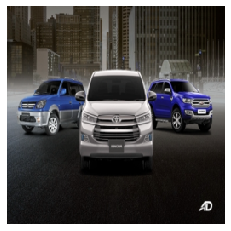

In [ ]:
plot_image(X_train_cnn[0])
print(get_key(y_train[0]))

MPV


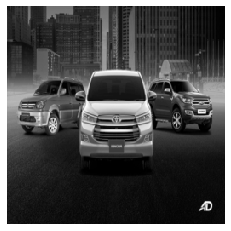

In [ ]:
plot_image(X_train_bw[0])
print(get_key(y_train[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


MPV


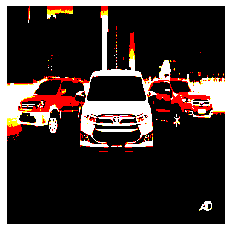

In [ ]:
plot_image(X_train_Res[0])
print(get_key(y_train[0]))

convertable


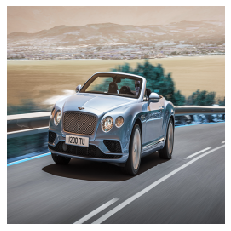

In [ ]:
plot_image(X_valid_cnn[0])
print(get_key(y_valid[0]))

convertable


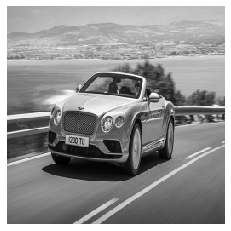

In [ ]:
plot_image(X_valid_bw[0])
print(get_key(y_valid[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


convertable


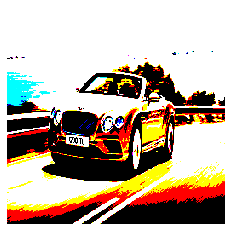

In [ ]:
plot_image(X_valid_Res[0])
print(get_key(y_valid[0]))

pickup


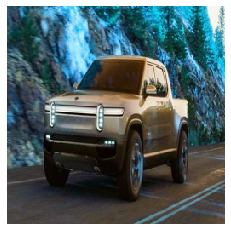

In [ ]:
plot_image(X_test_cnn[0])
print(get_key(y_test[0]))

pickup


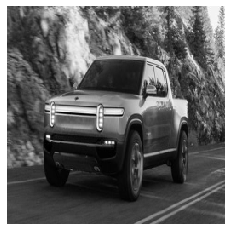

In [ ]:
plot_image(X_test_bw[0])
print(get_key(y_test[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pickup


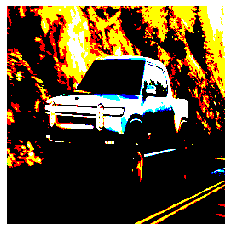

In [ ]:
plot_image(X_test_Res[0])
print(get_key(y_test[0]))

##Analysis

####Baseline Models

######Baseline I - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train_logReg = np.reshape(X_train_bw, (X_train_bw.shape[0], -1))
X_test_logReg = np.reshape(X_test_bw, (X_test_bw.shape[0], -1))

In [ ]:
logReg = LogisticRegression(penalty='l2') # l2 regularization
logReg.fit(X_train_logReg, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
score = logReg.score(X_test_logReg, y_test)
print(score)

0.21866666666666668


pred: pickup
ans: MPV


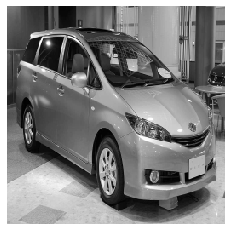

In [ ]:
testIn = 100

plot_image(X_test_bw[testIn])
print('pred:', get_key(logReg.predict(X_test_logReg[testIn].reshape(1,-1))))
print('ans:', get_key(y_test[testIn]))

pred: sedan
ans: pickup


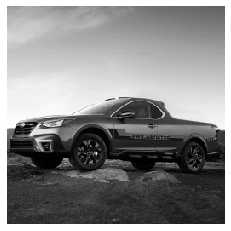

In [ ]:
testIn = 101

plot_image(X_test_bw[testIn])
print('pred:', get_key(logReg.predict(X_test_logReg[testIn].reshape(1,-1))))
print('ans:', get_key(y_test[testIn]))

pred: sedan
ans: pickup


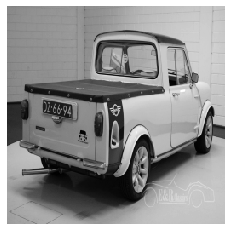

In [ ]:
testIn = 102

plot_image(X_test_bw[testIn])
print('pred:', get_key(logReg.predict(X_test_logReg[testIn].reshape(1,-1))))
print('ans:', get_key(y_test[testIn]))

In conclusion, Logistic Regression performes terribly.

######Baseline II - Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_features=1000)
rf.fit(X_train_logReg, y_train)

RandomForestClassifier(max_features=1000)

In [ ]:
score = rf.score(X_test_logReg, y_test)
print(score)

0.24


pred: station_wagon
ans: MPV


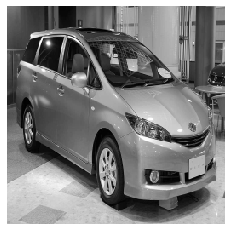

In [ ]:
testIn = 100

plot_image(X_test_bw[testIn])
print('pred:', get_key(rf.predict(X_test_logReg[testIn].reshape(1,-1))))
print('ans:', get_key(y_test[testIn]))

pred: SUV
ans: pickup


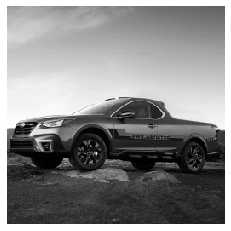

In [ ]:
testIn = 101

plot_image(X_test_bw[testIn])
print('pred:', get_key(rf.predict(X_test_logReg[testIn].reshape(1,-1))))
print('ans:', get_key(y_test[testIn]))

pred: sedan
ans: pickup


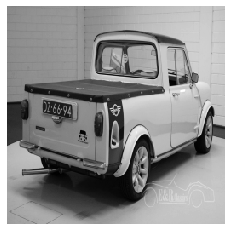

In [ ]:
testIn = 102

plot_image(X_test_bw[testIn])
print('pred:', get_key(rf.predict(X_test_logReg[testIn].reshape(1,-1))))
print('ans:', get_key(y_test[testIn]))

In conclusion, Random Forest also performes terribly.

####Dense Neural Network

In [ ]:
nn = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[256,256]),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])

nn.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 1024)              67109888  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 6)                 3

In [ ]:
history = nn.fit(X_train_bw, y_train, epochs=20, validation_data=(X_valid_bw, y_valid))

Epoch 1/20
24/24 [==============================] - 4s 34ms/step - loss: 22.9503 - accuracy: 0.1484 - val_loss: 11.0615 - val_accuracy: 0.1711
Epoch 2/20
24/24 [==============================] - 0s 21ms/step - loss: 4.7886 - accuracy: 0.1618 - val_loss: 5.1790 - val_accuracy: 0.1578
Epoch 3/20
24/24 [==============================] - 1s 21ms/step - loss: 2.9141 - accuracy: 0.1751 - val_loss: 2.1270 - val_accuracy: 0.1872
Epoch 4/20
24/24 [==============================] - 1s 21ms/step - loss: 2.0786 - accuracy: 0.1925 - val_loss: 2.0147 - val_accuracy: 0.1631
Epoch 5/20
24/24 [==============================] - 1s 21ms/step - loss: 1.8667 - accuracy: 0.2219 - val_loss: 2.1354 - val_accuracy: 0.1765
Epoch 6/20
24/24 [==============================] - 1s 21ms/step - loss: 1.7867 - accuracy: 0.2634 - val_loss: 2.0516 - val_accuracy: 0.1818
Epoch 7/20
24/24 [==============================] - 0s 21ms/step - loss: 1.7427 - accuracy: 0.2527 - val_loss: 1.8598 - val_accuracy: 0.1684
Epoch 8/20


In [ ]:
nn.evaluate(X_test_bw, y_test, verbose=0)

[2.076885938644409, 0.2133333384990692]

pred: sedan
ans: MPV


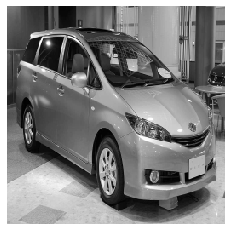

In [ ]:
testIn = 100

plot_image(X_test_bw[testIn])
index = nn.predict(np.expand_dims(X_test_bw[testIn], axis=0))
print('pred:', get_key(np.argmax(index)))
print('ans:', get_key(y_test[testIn]))

pred: sedan
ans: pickup


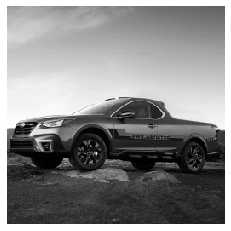

In [ ]:
testIn = 101

plot_image(X_test_bw[testIn])
index = nn.predict(np.expand_dims(X_test_bw[testIn], axis=0))
print('pred:', get_key(np.argmax(index)))
print('ans:', get_key(y_test[testIn]))

pred: sedan
ans: pickup


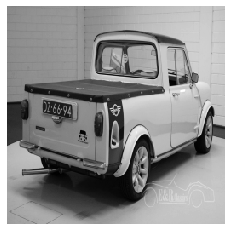

In [ ]:
testIn = 102

plot_image(X_test_bw[testIn])
index = nn.predict(np.expand_dims(X_test_bw[testIn], axis=0))
print('pred:', get_key(np.argmax(index)))
print('ans:', get_key(y_test[testIn]))

In [ ]:
predNN = []

rawPredNN = nn.predict(X_test_bw)

for i in rawPredNN:
  predNN.append(get_key(np.argmax(i)))

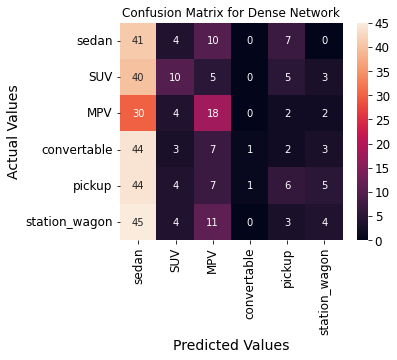

In [ ]:
matrixNN = confusion_matrix(y_test_values, predNN, labels=['sedan','SUV', 'MPV', 'convertable', 'pickup', 'station_wagon'])
matrixNNDF = pd.DataFrame(matrixNN, index = ['sedan','SUV', 'MPV', 'convertable', 'pickup', 'station_wagon'], columns = ['sedan','SUV', 'MPV', 'convertable', 'pickup', 'station_wagon'])

plt.figure(figsize=(5,4))
sns.heatmap(matrixNNDF, annot=True)
plt.title('Confusion Matrix for Dense Network')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Yeahhh... This model is not that good. Who knew a regular dense neural network would perform bad in image classification?

####Convolutional Neural Network

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, strides=2, activation='relu', padding="SAME")

cnn = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[256, 256, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=6, activation='softmax'),
])

cnn.compile(loss="sparse_categorical_crossentropy", 
            optimizer=keras.optimizers.Adam(), metrics=["accuracy"])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)       

In [ ]:
history = cnn.fit(X_train_cnn, y_train, epochs=20, validation_data=(X_valid_cnn, y_valid))

Epoch 1/20
24/24 [==============================] - 12s 66ms/step - loss: 1.8060 - accuracy: 0.1484 - val_loss: 1.7923 - val_accuracy: 0.1578
Epoch 2/20
24/24 [==============================] - 1s 36ms/step - loss: 1.7911 - accuracy: 0.1778 - val_loss: 1.7910 - val_accuracy: 0.1604
Epoch 3/20
24/24 [==============================] - 1s 36ms/step - loss: 1.7765 - accuracy: 0.2219 - val_loss: 1.7762 - val_accuracy: 0.2032
Epoch 4/20
24/24 [==============================] - 1s 36ms/step - loss: 1.7338 - accuracy: 0.2647 - val_loss: 1.7625 - val_accuracy: 0.2433
Epoch 5/20
24/24 [==============================] - 1s 36ms/step - loss: 1.6418 - accuracy: 0.3676 - val_loss: 1.8302 - val_accuracy: 0.2487
Epoch 6/20
24/24 [==============================] - 1s 36ms/step - loss: 1.4784 - accuracy: 0.4372 - val_loss: 2.0651 - val_accuracy: 0.2273
Epoch 7/20
24/24 [==============================] - 1s 36ms/step - loss: 1.2866 - accuracy: 0.5388 - val_loss: 1.9729 - val_accuracy: 0.2674
Epoch 8/20
2

In [ ]:
cnn.evaluate(X_test_cnn, y_test, verbose=0)

[3.5358476638793945, 0.30399999022483826]

pred: station_wagon
ans: MPV


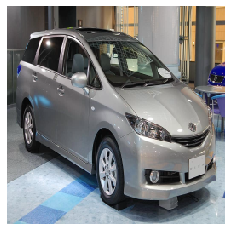

In [ ]:
testIn = 100

plot_image(X_test_cnn[testIn])
index = cnn.predict(np.expand_dims(X_test_cnn[testIn], axis=0))
print('pred:', get_key(np.argmax(index)))
print('ans:', get_key(y_test[testIn]))

pred: pickup
ans: pickup


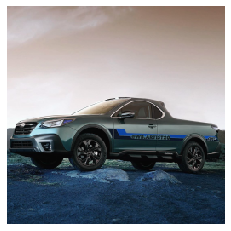

In [ ]:
testIn = 101

plot_image(X_test_cnn[testIn])
index = cnn.predict(np.expand_dims(X_test_cnn[testIn], axis=0))
print('pred:', get_key(np.argmax(index)))
print('ans:', get_key(y_test[testIn]))

pred: MPV
ans: pickup


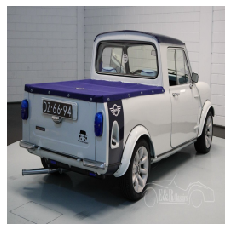

In [ ]:
testIn = 102

plot_image(X_test_cnn[testIn])
index = cnn.predict(np.expand_dims(X_test_cnn[testIn], axis=0))
print('pred:', get_key(np.argmax(index)))
print('ans:', get_key(y_test[testIn]))

In [ ]:
predCNN = []

rawPredCNN = cnn.predict(X_test_cnn)

for i in rawPredCNN:
  predCNN.append(get_key(np.argmax(i)))

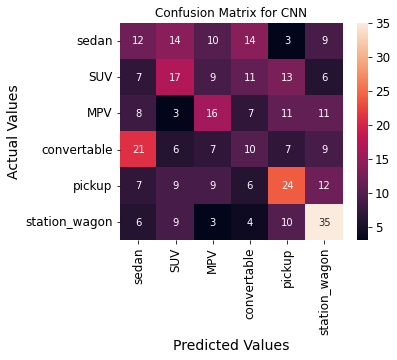

In [ ]:
matrixCNN = confusion_matrix(y_test_values, predCNN, labels=['sedan','SUV', 'MPV', 'convertable', 'pickup', 'station_wagon'])
matrixCNNDF = pd.DataFrame(matrixCNN, index = ['sedan','SUV', 'MPV', 'convertable', 'pickup', 'station_wagon'], columns = ['sedan','SUV', 'MPV', 'convertable', 'pickup', 'station_wagon'])

plt.figure(figsize=(5,4))
sns.heatmap(matrixCNNDF, annot=True)
plt.title('Confusion Matrix for CNN')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

####Transfer Learning with ResNet50

In [ ]:
baseModel = keras.applications.resnet50.ResNet50(weights="imagenet", include_top = False)
avg = keras.layers.GlobalAveragePooling2D()(baseModel.output)
output = keras.layers.Dense(6, activation="softmax")(avg)
transfer = keras.models.Model(inputs=baseModel.input, outputs=output)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
baseModel.summary()

In [ ]:
for layer in baseModel.layers:
    layer.trainable = False

optimizer = keras.optimizers.Adam()
transfer.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = transfer.fit(x = X_train_Res, y = y_train, epochs=20, validation_data=(X_valid_Res, y_valid))

Epoch 1/20
24/24 [==============================] - 11s 300ms/step - loss: 1.4978 - accuracy: 0.4184 - val_loss: 1.1156 - val_accuracy: 0.6283
Epoch 2/20
24/24 [==============================] - 5s 198ms/step - loss: 0.8737 - accuracy: 0.6872 - val_loss: 0.9061 - val_accuracy: 0.6845
Epoch 3/20
24/24 [==============================] - 5s 198ms/step - loss: 0.6717 - accuracy: 0.7955 - val_loss: 0.8293 - val_accuracy: 0.7273
Epoch 4/20
24/24 [==============================] - 5s 198ms/step - loss: 0.5711 - accuracy: 0.8128 - val_loss: 0.8254 - val_accuracy: 0.6925
Epoch 5/20
24/24 [==============================] - 5s 197ms/step - loss: 0.5012 - accuracy: 0.8382 - val_loss: 0.7867 - val_accuracy: 0.7139
Epoch 6/20
24/24 [==============================] - 5s 195ms/step - loss: 0.4430 - accuracy: 0.8636 - val_loss: 0.7812 - val_accuracy: 0.7299
Epoch 7/20
24/24 [==============================] - 5s 194ms/step - loss: 0.3911 - accuracy: 0.8850 - val_loss: 0.7333 - val_accuracy: 0.7674
Epoch

In [ ]:
transfer.summary()

In [ ]:
transfer.evaluate(X_test_Res, y_test, verbose=0)

[0.698179304599762, 0.762666642665863]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred: MPV
ans: MPV


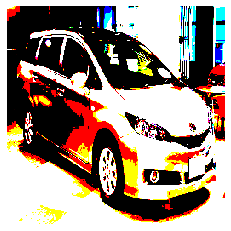

In [ ]:
testIn = 100

plot_image(X_test_Res[testIn])
index = transfer.predict(np.expand_dims(X_test_Res[testIn], axis=0))
print('pred:', get_key(np.argmax(index)))
print('ans:', get_key(y_test[testIn]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred: pickup
ans: pickup


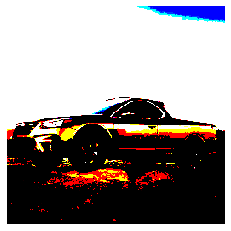

In [ ]:
testIn = 101

plot_image(X_test_Res[testIn])
index = transfer.predict(np.expand_dims(X_test_Res[testIn], axis=0))
print('pred:', get_key(np.argmax(index)))
print('ans:', get_key(y_test[testIn]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred: pickup
ans: pickup


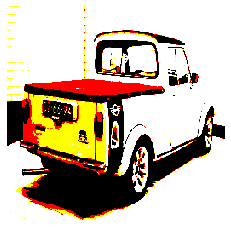

In [ ]:
testIn = 102

plot_image(X_test_Res[testIn])
index = transfer.predict(np.expand_dims(X_test_Res[testIn], axis=0))
print('pred:', get_key(np.argmax(index)))
print('ans:', get_key(y_test[testIn]))

In [ ]:
predRes = []

rawPredRes = transfer.predict(X_test_Res)

for i in rawPredRes:
  predRes.append(get_key(np.argmax(i)))

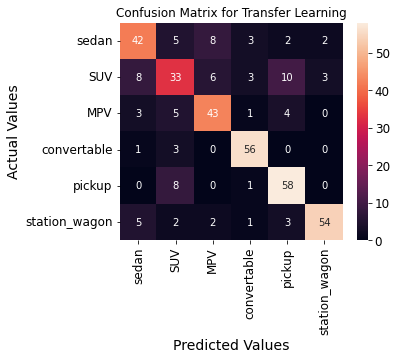

In [ ]:
matrixRes = confusion_matrix(y_test_values, predRes, labels=['sedan','SUV', 'MPV', 'convertable', 'pickup', 'station_wagon'])
matrixResDF = pd.DataFrame(matrixRes, index = ['sedan','SUV', 'MPV', 'convertable', 'pickup', 'station_wagon'], columns = ['sedan','SUV', 'MPV', 'convertable', 'pickup', 'station_wagon'])

plt.figure(figsize=(5,4))
sns.heatmap(matrixResDF, annot=True)
plt.title('Confusion Matrix for Transfer Learning')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()